# 단일 문서의 워드 클라우드  

In [1]:
!pip install nltk
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
from konlpy.corpus import kobill

In [3]:
# 데이터 임포팅
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [4]:
doc_ko[:1000]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [5]:
# 명사만 추출
from konlpy.tag import Okt
t = Okt()
tokens_ko = t.nouns(doc_ko)

In [6]:
tokens_ko[:30]

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인']

In [7]:
# 사용 빈도 확인
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [8]:
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

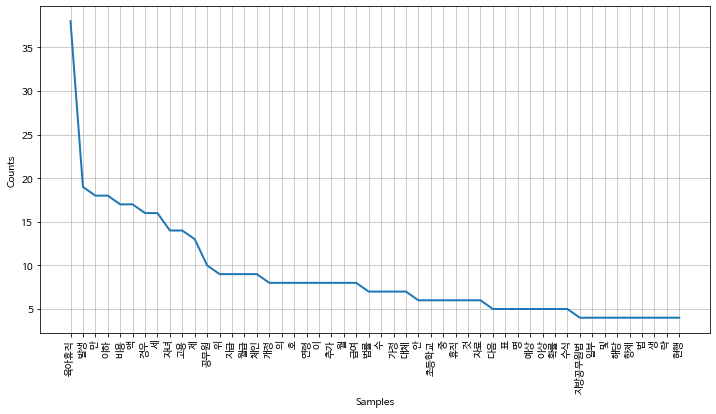

In [10]:
# 빈도 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12, 6))
ko.plot(50)

In [11]:
# 불용어 수동 설정
stop_words = ['.', ',' '(', ')', '"', "'", '%', '의', '자', '에', '안', '번', '호', '을', '를', '이', '다', '만', '로', '가']
ko = [i for i in ko if i not in stop_words]
ko[:10]

['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일']

In [12]:
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

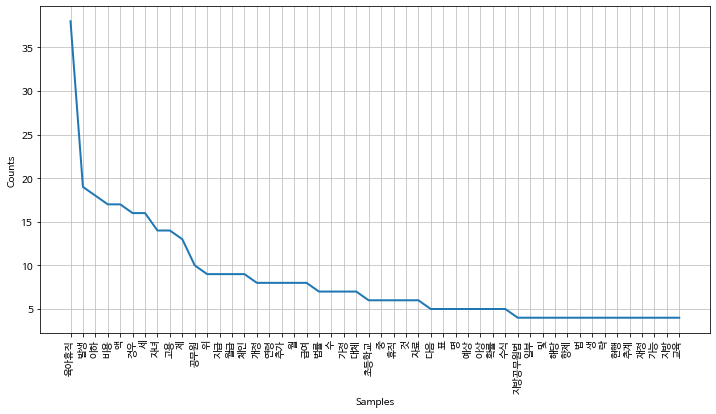

In [13]:
# 다시 시각화
ko = nltk.Text(ko)

plt.figure(figsize=(12, 6))
plt.rc('font', family='NanumBarunGothic')
ko.plot(50)
plt.show()

In [14]:
# nltk.Text 클래스의 다양한 기능

# 카운트트
ko.count('육아휴직')

38

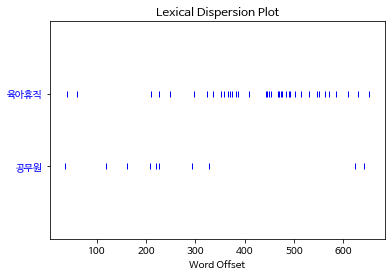

In [15]:
# 단어 위치 시각화화
ko.dispersion_plot(['육아휴직', '공무원'])

In [16]:
# 주변 단어 파악
ko.concordance('육아휴직')

Displaying 25 of 38 matches:
학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자
 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임 따라서 육아휴직 자녀 연령 세 이하 개정 것임 제 항제 법률 제 지방공무원법 일부
자녀 연령 세 이하 세 이하 방공 무 법 제 항제 중 지방 공무원 육아휴직 가능 자녀 연 령 세 이하 세 이하 교육 공무원 법 제 항 제 중
 령 세 이하 세 이하 교육 공무원 법 제 항 제 중 교육 공무원 육아휴직 가능 자녀 연령 세 이하 세 이하 남녀 고용 평등 일 가정 양립 
하 남녀 고용 평등 일 가정 양립 지원 관 법률 제 항 중 근로자 육아휴직 가능 자녀 연령 세 이하 세 이하 조정 함 추가 재정 요가 예상 
경우 해당 함 첨부 사유 개정안 국가 지방 교육 공무원 및 근로자 육아휴직 신청 수 자녀 연령 세 이하 세 이하 상향 조정 함 추가 재정 요
 요가 예상 법률 개정안 시행 고 가정 경우 현재 자녀 연령 세이 육아휴직 신청 국가 지방 교육 공무원 및 근로자 대상 대상 연령 확대 육아
휴직 신청 국가 지방 교육 공무원 및 근로자 대상 대상 연령 확대 육아휴직 신청 수가 정도 것 예상 경우 발생 비용 현행법 월 이나 현재 관
 예상 경우 발생 비용 현행법 월 이나 현재 관련 법령 개정 추진 육아휴직 지급 월급 액 비례 육아휴직 여가 지급 기 때문 법령 개정 가정 
 월 이나 현재 관련 법령 개정 추진 육아휴직 지급 월급 액 비례 육아휴직 여가 지급 기 때문 법령 개정 가정 추계 경우 육아휴직 급여 액 
 액 비례 육아휴직 여가 지급 기 때문 법령 개정 가정 추계 경우 육아휴직 급여 액 육아휴직 지급 월급 여의 해당 육아휴직 발생 경우 발생 
 여가 지급 기 때문 법령 개정 가정 추계 경우 육아휴직 급여 액 육아휴직 지급 월급 여의 해당 육아휴직 발생 경우 발생 비용 체인 고용 인
 가정 추계 경우 육아휴직 급여 액 육아휴

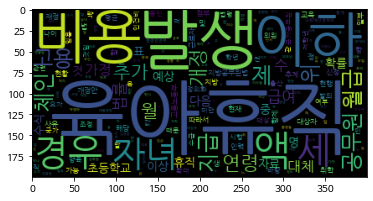

In [17]:
# 워드 클라우드 생성
from wordcloud import WordCloud
data = ko.vocab().most_common(200)

plt.rc('font', family='NanumBarunGothic')
wordcloud = WordCloud(relative_scaling=0.2,
                      font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate_from_frequencies(dict(data))
plt.imshow(wordcloud)
plt.show()

In [18]:
#생략

# 문장의 유사도
텍스트를 벡터로 변환하여 벡터 간 유사성을 파악한다  
___

### 대중적인 벡터화 툴
1. sklearn bag of words model
2. TF-IDF

___
### 학습목표
1. 문서를 벡터로 변환하는 방법을 이해한다  
2. 상황에 맞게 적절한 벡터화 방법을 선택한다  

## 원핫 벡터화와 유사도 

In [19]:
# 첫 번째 벡터화: 어휘 단순 열거하기 

#예시 문장
sentences = ['It was the best of times',
             'it was the worst of times',
             'it was the age of wisdom',
             'it was the age of foolishness']

# 띄어쓰기로 토큰화 
tokenized_sentences = [[t for t in sentence.split()]for sentence in sentences]
tokenized_sentences

[['It', 'was', 'the', 'best', 'of', 'times'],
 ['it', 'was', 'the', 'worst', 'of', 'times'],
 ['it', 'was', 'the', 'age', 'of', 'wisdom'],
 ['it', 'was', 'the', 'age', 'of', 'foolishness']]

In [20]:
# 중복을 제거한 전체 단어사전
vocabulary = set([w for s in tokenized_sentences for w in s])
vocabulary

{'It',
 'age',
 'best',
 'foolishness',
 'it',
 'of',
 'the',
 'times',
 'was',
 'wisdom',
 'worst'}

In [21]:
# enumerate를 이용한 pd.DataFrame으로 단순 열거

import pandas as pd
import numpy as np
pd.DataFrame([[w, i]for i, w in enumerate(vocabulary)])

,0,1
0,worst,0
1,best,1
2,of,2
3,the,3
4,wisdom,4
5,foolishness,5
6,was,6
7,it,7
8,It,8
9,times,9


In [157]:
# 두 번째 벡터화: 원-핫 인코딩을 이용한 문서 벡터화
def onehot_encode(tokenized_sentence, vocabulary):
  return [1 if w in tokenized_sentence else 0 for w in vocabulary]

onehot = [onehot_encode(tokenized_sentence, vocabulary) for tokenized_sentence in tokenized_sentences]
onehot

[[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0],
 [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1],
 [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]]

In [23]:
for (sentence, oh) in zip(sentences, onehot):
  print('%s: %s' % (oh, sentence))

[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]: It was the best of times
[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]: it was the worst of times
[0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]: it was the age of wisdom
[0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]: it was the age of foolishness


In [24]:
# 사실 여기서 내적을 통해 바로 유사도를 뽑을 수 있음
np.dot(onehot[0], onehot[3]) # 1, 4번 문장의 유사도

3

In [25]:
# 원핫인코딩 문서벡터화에 새로운 단어를 넣으면?
#1. 있는 단어는 1로 인코딩 됨
#2. 없는 단어는 0으로 인코딩 됨

onehot_encode('It')

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [26]:
# 문서 단순 열거와 원핫 인코딩을 섞으면 '문서-용어 행렬'
pd.DataFrame(onehot, columns=vocabulary)

,worst,best,of,the,wisdom,foolishness,was,it,It,times,age
0,0,1,1,1,0,0,1,0,1,1,0
1,1,0,1,1,0,0,1,1,0,1,0
2,0,0,1,1,1,0,1,1,0,0,1
3,0,0,1,1,0,1,1,1,0,0,1


In [27]:
# 원핫 인코딩을 통한 문장 간 유사도 계산 : 1이 공통으로 나온 횟수
sim = [onehot[0][i] & onehot[1][i] for i in range(0, len(vocabulary))]

# 0번 문장과 1번 문장의 공통된 1
sim

[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]

In [28]:
# 0번 문장과 1번 문장의 유사도
sum(sim)

4

## 내가 도전해본 예시 

In [29]:
# 예시
menu = ['밀 양 돼지국 밥',
        '부산 돼 지 국 밥']

# 띄어쓰기 단위로 토큰화
tokenized_menu = [[k for j in i.split() for k in j] for i in menu]

In [30]:
tokenized_menu

[['밀', '양', '돼', '지', '국', '밥'], ['부', '산', '돼', '지', '국', '밥']]

In [31]:
menu_vocabulary = set(j for i in tokenized_menu for j in i)

In [32]:
# 단어 사전
menu_vocabulary

{'국', '돼', '밀', '밥', '부', '산', '양', '지'}

In [33]:
# 단순 열거
pd.DataFrame([value, idx] for idx, value in enumerate(menu_vocabulary))

,0,1
0,밥,0
1,산,1
2,밀,2
3,지,3
4,양,4
5,국,5
6,돼,6
7,부,7


In [34]:
# 원핫 벡터화
def onehot_encode(tokenized_sentence, vocabulary):
  return [1 if w in tokenized_sentence else 0 for w in vocabulary]

In [35]:
onehot_menu = [onehot_encode(tokenized_menu, menu_vocabulary) for tokenized_menu in tokenized_menu]

In [36]:
onehot_menu

[[1, 0, 1, 1, 1, 1, 1, 0], [1, 1, 0, 1, 0, 1, 1, 1]]

In [37]:
# 문서-용어 행렬
pd.DataFrame(columns=menu_vocabulary, data=onehot_menu)

,밥,산,밀,지,양,국,돼,부
0,1,0,1,1,1,1,1,0
1,1,1,0,1,0,1,1,1


In [38]:
# 두 단어 간 유사도 측정
sim = [onehot_menu[0][i] & onehot_menu[1][i] for i in range(0, len(menu_vocabulary))]
sim, sum(sim)

([1, 0, 0, 1, 0, 1, 1, 0], 4)

In [39]:
# 두 원핫 벡터 간 유사도를 측정하는 내적
import numpy as np
np.dot(onehot_menu[0], onehot_menu[1])

4

## 여기까지 힘들게 코드 짰니? 이제 한 방에 쓰는 라이브러리 알려줄게 ^^  

In [40]:
# 바로 sklearn.preprovessing.MultiLabelBinarizer란다 ㅎㅎ

from sklearn.preprocessing import MultiLabelBinarizer
lb = MultiLabelBinarizer()
lb.fit(menu_vocabulary) # 단어사전만 리스트로 형태로 넣어보렴
sim = lb.transform(['전주 콩나물 국밥'])[0]
print(sim)
print(sum(sim))

[1 0 0 1 0 0 0 0]
2


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:875: UserWarning: unknown class(es) [' ', '나', '물', '전', '주', '콩'] will be ignored
  warnings.warn(


# 여기까지 인사이트

1. from sklearn.preprocessing import MultiLabelBinarizer  
이걸 사용하면 onehot벡터 유사도를 쉽게 구할 수 있다

2. 그런데 단어 사전은 만들어야지 ^^

3. 혹시 단어사전도 쉽게 만드는 라이브러리나 토크나이저가 있..겠지 ㅎ 

# 더 효과적인 사이킷런 CountVectorizer

### 단어 가방 모델

In [41]:
# 특성 추출을 할 때 사용하는 라이브러리라고 한다
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [42]:
# 예시 문장
sentences += ['John like to watch movies. Mary likes movies too.',
              'Mary also likes to watch football games.']
sentences

['It was the best of times',
 'it was the worst of times',
 'it was the age of wisdom',
 'it was the age of foolishness',
 'John like to watch movies. Mary likes movies too.',
 'Mary also likes to watch football games.']

In [43]:
# CountVectorize의 두 단계
#1. 어휘학습 => 단어사전 생성기나 다름없네 
cv.fit(sentences)
cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'also',
 'best',
 'foolishness',
 'football',
 'games',
 'it',
 'john',
 'like',
 'likes',
 'mary',
 'movies',
 'of',
 'the',
 'times',
 'to',
 'too',
 'was',
 'watch',
 'wisdom',
 'worst']

In [44]:
# CountVectorize의 두 단계
#2. 벡터화 : 문서-용어행렬 반환 (희소행렬로 반환함에 유의)
dt = cv.transform(sentences)
dt

<6x21 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [45]:
# 문서-용어 희소행렬 복호화
pd.DataFrame(dt.toarray(), columns=cv.get_feature_names())

,age,also,best,foolishness,football,games,it,john,like,likes,...,movies,of,the,times,to,too,was,watch,wisdom,worst
0,0,0,1,0,0,0,1,0,0,0,...,0,1,1,1,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,1,1,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
3,1,0,0,1,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,1,1,...,2,0,0,0,1,1,0,1,0,0
5,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [46]:
# 그럼 유사도를 어떻게 계산하는가?
#1. 내적 => 벡터의 크기에 민감하다
#2. 유클리드거리 => 고차원에서 유용하지 않다고 한다
#3. 적절한 방법은 코사인 유사도

# 코사인 유사도
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(dt[0], dt[1])

array([[0.83333333]])

In [47]:
# 코사인 유사도 행렬
pd.DataFrame(cosine_similarity(dt, dt))

,0,1,2,3,4,5
0,1.000000,0.833333,0.666667,0.666667,0.000000,0.000000
1,0.833333,1.000000,0.666667,0.666667,0.000000,0.000000
2,0.666667,0.666667,1.000000,0.833333,0.000000,0.000000
3,0.666667,0.666667,0.833333,1.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.455842
5,0.000000,0.000000,0.000000,0.000000,0.455842,1.000000


### 내 맘대로 실습

In [48]:
df = pd.read_csv('menu_concated_v1.2', index_col=0)

In [1]:
import re
def pre_processing(string):
  string = re.sub('\((.*?)\)', '', string) # 괄호 안 내용 모두 삭제
  string = re.sub('[^가-힣]', '', string) # 한글이 아닌거 전부 삭제
  string = re.sub('[ ]', '', string) # 공백 제거
  return string

In [114]:
df['menu'] = df['메뉴명'].apply(pre_processing)
menu_list = df['menu'].unique()

In [115]:
len(menu_list)

51438

In [116]:
list(menu_list)[:10]

['정식', '짜장면', '짬뽕', '우동', '울면', '간짜장', '사천짜장', '삼선짜장', '유니짜장', '삼선우동']

In [117]:
cv = CountVectorizer()
cv.fit(menu_list)
cv.get_feature_names()[:10]

['가께우동',
 '가꾸니동',
 '가끼아게텐동',
 '가나슈',
 '가나초콜릿',
 '가니',
 '가니죠스이',
 '가다보',
 '가든관자파스타',
 '가든샐러드']

In [118]:
# 문서-용어 희소행렬
dt_menu = cv.transform(menu_list)
dt_menu

<51438x51309 sparse matrix of type '<class 'numpy.int64'>'
	with 51309 stored elements in Compressed Sparse Row format>

In [55]:
# 문서-용어 행렬 복호화 (램 다운으로 실패)
# dt_df = pd.DataFrame(dt_menu.toarray(), columns=cv.get_feature_names())

In [56]:
# 코사인 유사도 행렬 (램 다운으로 실패)
# cosine_menu = pd.DataFrame(cosine_similarity(dt_menu, dt_menu))

In [119]:
# 샘플만 뽑아서 해보자
df_sample = df.sample(10000, random_state=42)

In [120]:
df_sample_menu = df_sample['menu'].unique()

In [121]:
cv = CountVectorizer()
cv.fit(df_sample_menu)
cv.get_feature_names()[:100]
dt_sample_menu = cv.transform(df_sample_menu)

In [122]:
dt_sample_df = pd.DataFrame(dt_sample_menu.toarray(), columns=cv.get_feature_names())
dt_sample_df

,가락우동,가로막살,가리비관자아히조바게트,가리비구이,가리비찜,가마로봉치킨,가마솥누룽지탕,가마치떡볶이,가마치즈볼,가브리살,...,히레사케,히레카츠,히비스커스,히비스커스레몬,히비스커스애플티,히비스커스후르츠,히야시멘,히츠마부시,히트라떼,힌민들레고기만두
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5739,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
cosine_menu = pd.DataFrame(cosine_similarity(dt_sample_menu, dt_sample_menu))
cosine_menu # 당연 유의미한 결과가 안나온다. 겹치는 단어가 흔치 않을테니. 토크나이징을 해봐야겠다.

,0,1,2,3,4,5,6,7,8,9,...,5731,5732,5733,5734,5735,5736,5737,5738,5739,5740
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [124]:
# 한 글자 단위로 토큰화
def part_away(string):
  temp = ''
  for ch in string:
    temp += ch
    temp += ' '
  return temp.rstrip()

In [141]:
df_sample['menu_tokenized'] = df_sample['menu'].apply(part_away)
df_sample_token = df_sample['menu_tokenized'].unique()
df_sample_token = list(df_sample_token)
df_sample_token = [[ch] for ch in df_sample_token]
df_sample_token[:10]

[['버 드 와 이 저'],
 ['소 한 마 리 해 장 국'],
 ['콜 드 브 루 라 떼'],
 ['순 대 만 주 문 시'],
 ['더 치 바 닐 라 라 떼'],
 ['해 바 라 기 후 라 이 드'],
 ['쫄 면'],
 ['딸 기 에 이 드'],
 ['콜 드 브 루 헤 이 즐 넛 라 떼'],
 ['생 고 기 목 살']]

In [ ]:
menu_vocabulary = set([k for s in df_sample_token for w in s for k in w])
menu_vocabulary

In [161]:
lb = MultiLabelBinarizer()
lb.fit(menu_vocabulary) # 단어사전만 리스트로 형태로 넣어보렴

MultiLabelBinarizer()

In [168]:
sim1 = lb.transform(['가 락 우 동'])
sim2 = lb.transform(['가 락 국 수'])

In [169]:
cosine_similarity(sim1, sim2)

array([[0.6]])

In [181]:
sim1 = lb.transform(['짜장면'])
sim2 = lb.transform(['해물짜장'])
cosine_similarity(sim1, sim2)

array([[0.57735027]])